## Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [61]:
#importing the necessary libraries
!pip install yfinance
!pip install bs4
#!pip install pandas

In [62]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

print('Libraries imported')

Libraries imported


### Question 1 - Extracting Tesla Stock Data Using yfinance

Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is TSLA.

* Using the attribute info we can extract information about the stock as a Python dictionary.
* Extracting the Stock Data using history() function.

In [30]:
# Using Ticker to get the info
tesla = yf.Ticker("TSLA")
tesla_info=tesla.info

# using the history fucntion 
tesla_stock_data = tesla.history(period="max")
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping
* Use the `requests` library to download the webpage  
* Save the text of the response as a variable named `html_tesla`.

In [76]:
url='https://finance.yahoo.com/quote/TSLA/history?p=TSLA'
html_tesla  = requests.get(url).text

soup = BeautifulSoup(html_tesla,"html5lib")
tables = soup.find_all('table')

tesla_df = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[5].text
    volume =col[6].text
    
    tesla_df = tesla_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

tesla_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Mar 05, 2021",626.06,627.84,539.49,597.95,"89,300,300",597.95
1,"Mar 04, 2021",655.80,873.94,600.00,621.44,"65,448,500",621.44
2,"Mar 03, 2021",687.99,700.70,651.71,653.20,"29,957,200",653.20
3,"Mar 02, 2021",718.28,721.11,685.00,686.44,"23,617,600",686.44
4,"Mar 01, 2021",690.11,719.00,685.05,718.43,"27,009,700",718.43


### Question 3 - Extracting GameStop Stock Data Using yfinance

Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is GameStop and the ticker symbol is GME.

* Using the attribute info we can extract information about the stock as a Python dictionary.
* Extracting the Stock Data using history() function.

In [33]:
# ticker usage
gamestop = yf.Ticker("GME")
gamestop_info=tesla.info

#using history
gamestop_stock_data = gamestop.history(period="max")
gamestop_stock_data.reset_index(inplace=True)
gamestop_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping 
* Use the `requests` library to download the webpage  
* Save the text of the response as a variable named `html_gamestop`.

In [77]:
url='https://finance.yahoo.com/quote/GME/history?p=GME'
html_gamestop  = requests.get(url).text

soup = BeautifulSoup(html_gamestop,"html5lib")
tables = soup.find_all('table')

gamestop_df = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[5].text
    volume =col[6].text
    
    gamestop_df = gamestop_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

gamestop_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Mar 05, 2021",128.17,151.53,127.50,137.74,"30,660,200",137.74
1,"Mar 04, 2021",125.00,147.87,115.30,132.35,"32,473,600",132.35
2,"Mar 03, 2021",122.51,127.75,113.12,124.18,"19,173,700",124.18
3,"Mar 02, 2021",116.93,133.20,112.20,118.18,"33,640,400",118.18
4,"Mar 01, 2021",104.54,133.99,99.97,120.40,"49,597,300",120.40


### Question 5 - Tesla Stock and Revenue Dashboard

* Stock Dashboard by Date 
* Revenue Dashboard by Date 

The max volume is:  304694000


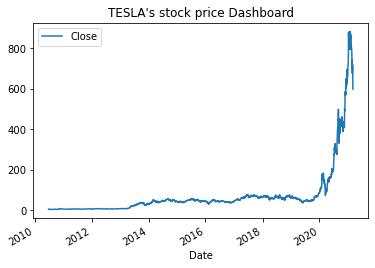

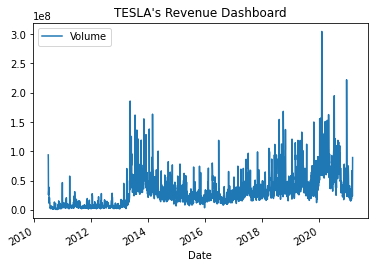

In [74]:
#RPlot the data
tesla_stock_data.plot(x="Date", y="Close", title="TESLA's stock price Dashboard")
tesla_stock_data.plot(x="Date", y="Volume", title="TESLA's Revenue Dashboard")

tesla_shpr = tesla.history(period="max")
print('The max volume is: ',tesla_shpr['Volume'].max())

### Question 6 - GameStop Stock and Revenue Dashboard

* Stock Dashboard by Date 
* Revenue Dashboard by Date 

The max volume is:  304694000


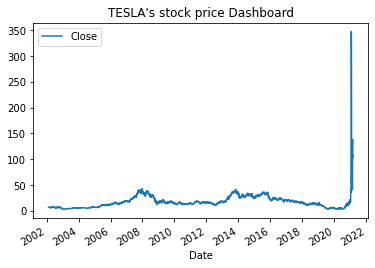

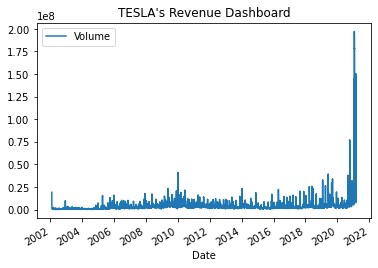

In [75]:
#Plot the data
gamestop_stock_data.plot(x="Date", y="Close", title="TESLA's stock price Dashboard")
gamestop_stock_data.plot(x="Date", y="Volume", title="TESLA's Revenue Dashboard")

gamestop_shpr = gamestop.history(period="max")
print('The max volume is: ',tesla_shpr['Volume'].max())